In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

In [42]:
df = pd.read_csv("cement_data.csv")

In [43]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [45]:
name_col = df.columns.tolist()
name_col

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

In [46]:
name_col[-1].split('(')

['Concrete compressive strength', 'MPa, megapascals) ']

In [47]:
name_col= [i.split('(')[0] for i in name_col]
name_col

['Cement ',
 'Blast Furnace Slag ',
 'Fly Ash ',
 'Water  ',
 'Superplasticizer ',
 'Coarse Aggregate  ',
 'Fine Aggregate ',
 'Age ',
 'Concrete compressive strength']

In [48]:
df.columns = name_col
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [50]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [51]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [52]:
df.duplicated().sum()

25

In [53]:
df[df.duplicated() == True]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [54]:
df.drop_duplicates(keep = 'first' , inplace = True)
df.duplicated().sum()

0

In [55]:
df.reset_index(drop = True, inplace=True)
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

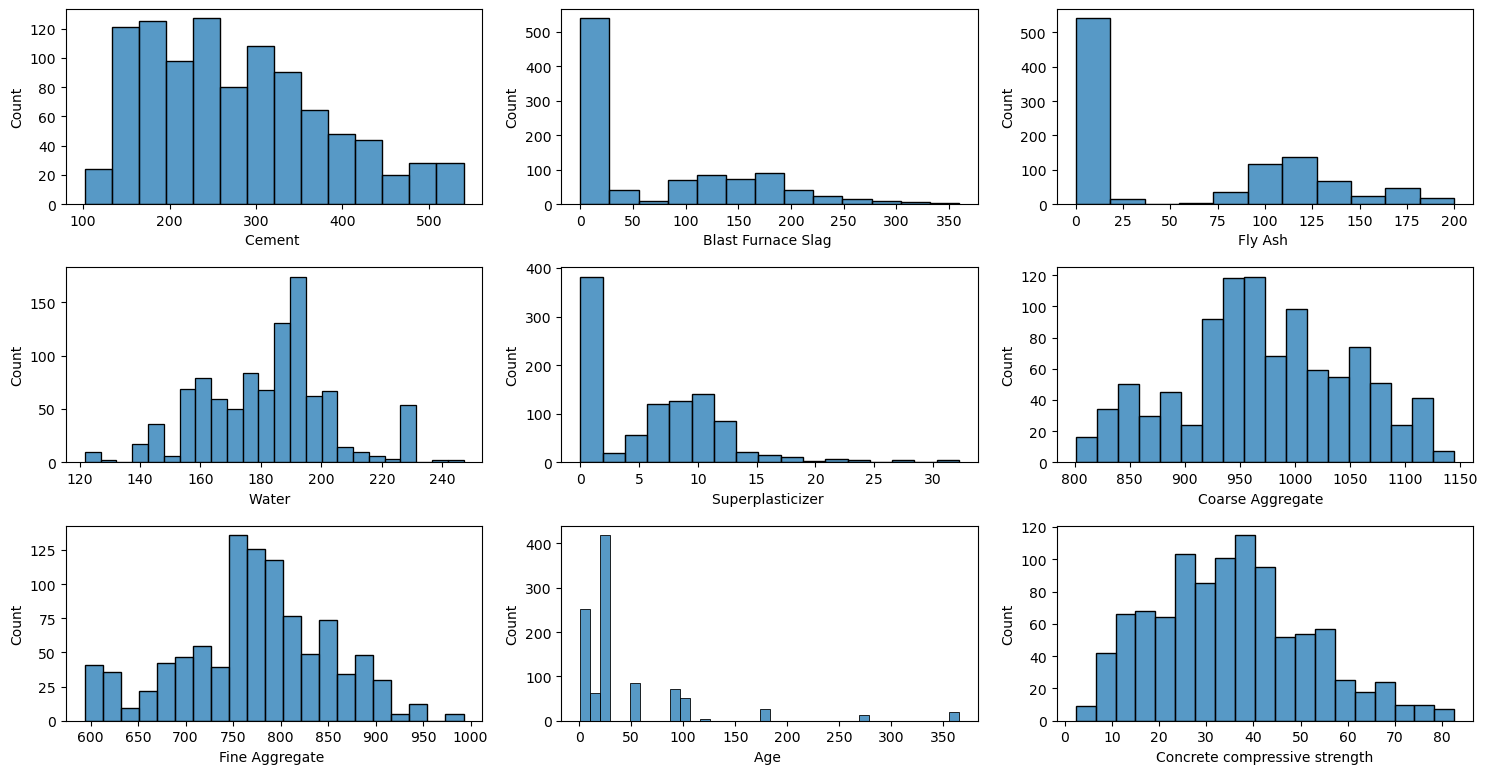

In [57]:
plt.figure(figsize=(15,10), facecolor= 'white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3, plotnumber)
    sns.histplot(df[i])
    plt.xlabel(i, fontsize = 10)
    plotnumber +=1
plt.tight_layout()
plt.show()

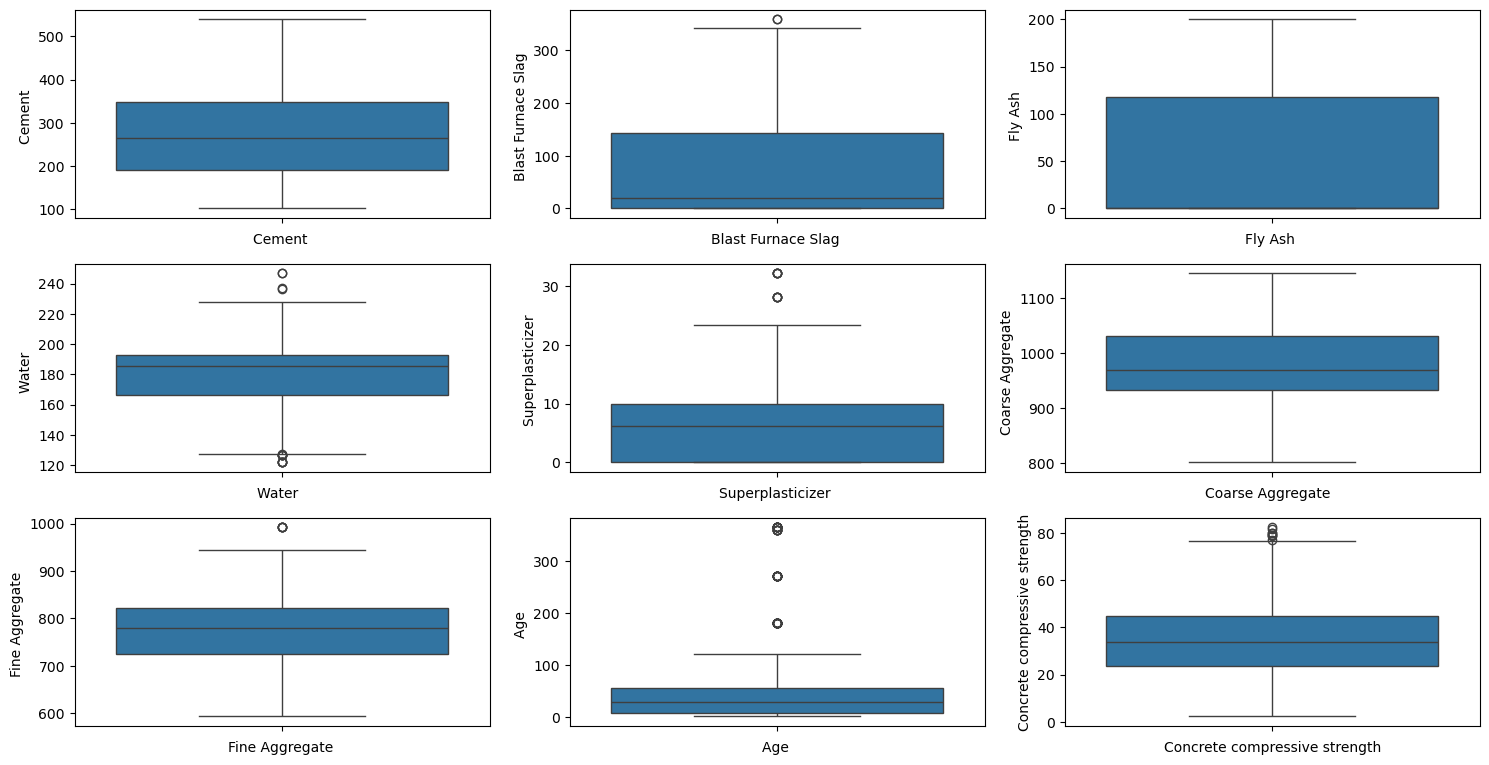

In [58]:
plt.figure(figsize=(15,10), facecolor= 'white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i, fontsize = 10)
    plotnumber +=1
plt.tight_layout()
plt.show()

In [59]:
df.columns

Index(['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water  ',
       'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ', 'Age ',
       'Concrete compressive strength'],
      dtype='object')

In [60]:
outliers = ['Blast Furnace Slag ','Water  ','Superplasticizer ','Fine Aggregate ','Age ']

In [61]:
def outlier_capping(dataframe: pd.DataFrame, outliers:list):
    df = dataframe.copy()
    for i in outliers:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q3 - 1.5 * iqr
        df.loc[df[i] > upper_limit, i] = upper_limit
        df.loc[df[i] <lower_limit, i] = lower_limit
    return df
df = outlier_capping(dataframe = df, outliers= outliers)

C:\Users\Shubham Kumar\AppData\Local\Temp\ipykernel_14768\1299134855.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '129.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] > upper_limit, i] = upper_limit


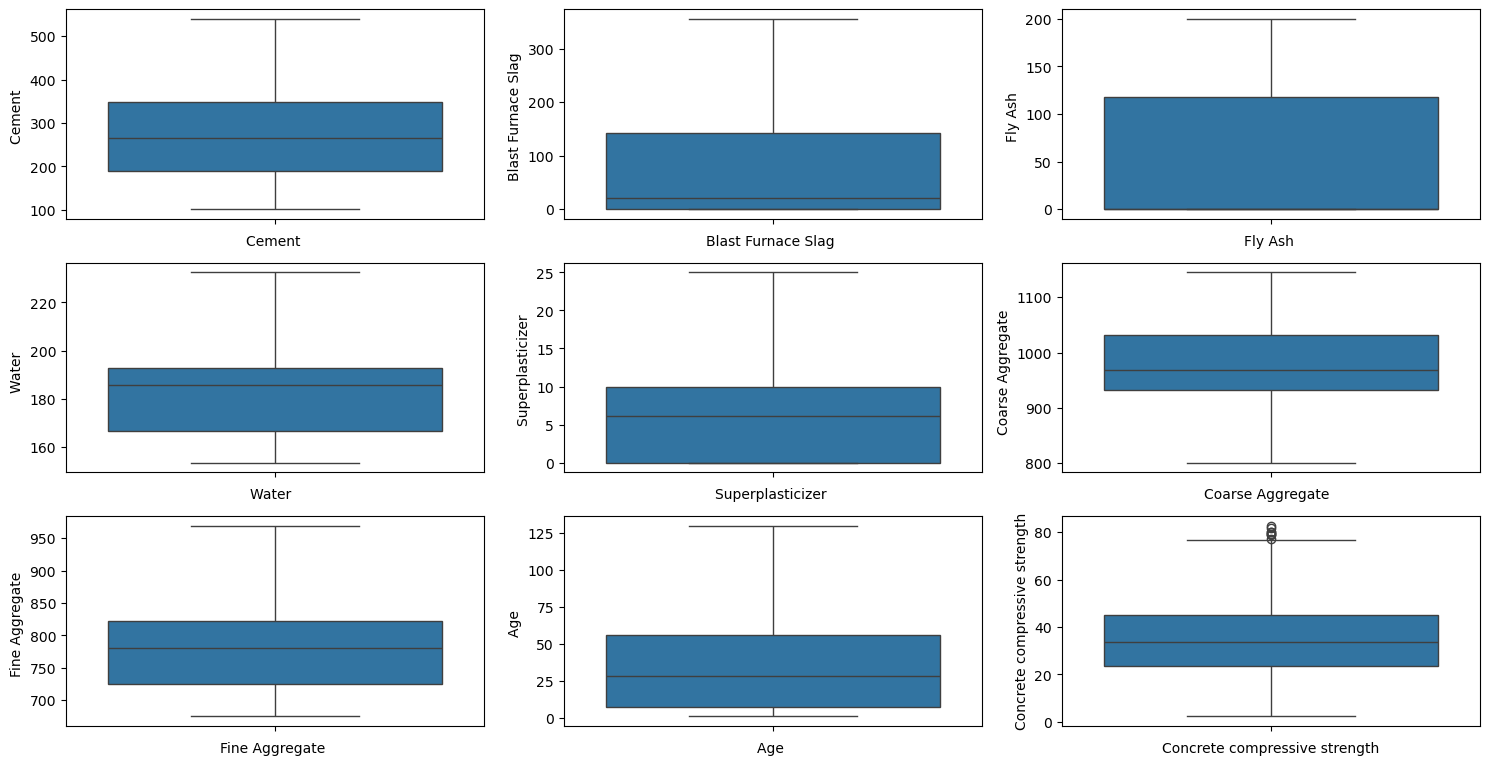

In [62]:
plt.figure(figsize=(15,10), facecolor= 'white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i, fontsize = 10)
    plotnumber +=1
plt.tight_layout()
plt.show()

In [63]:
X =  df.drop('Concrete compressive strength', axis = 1)
y = df['Concrete compressive strength']

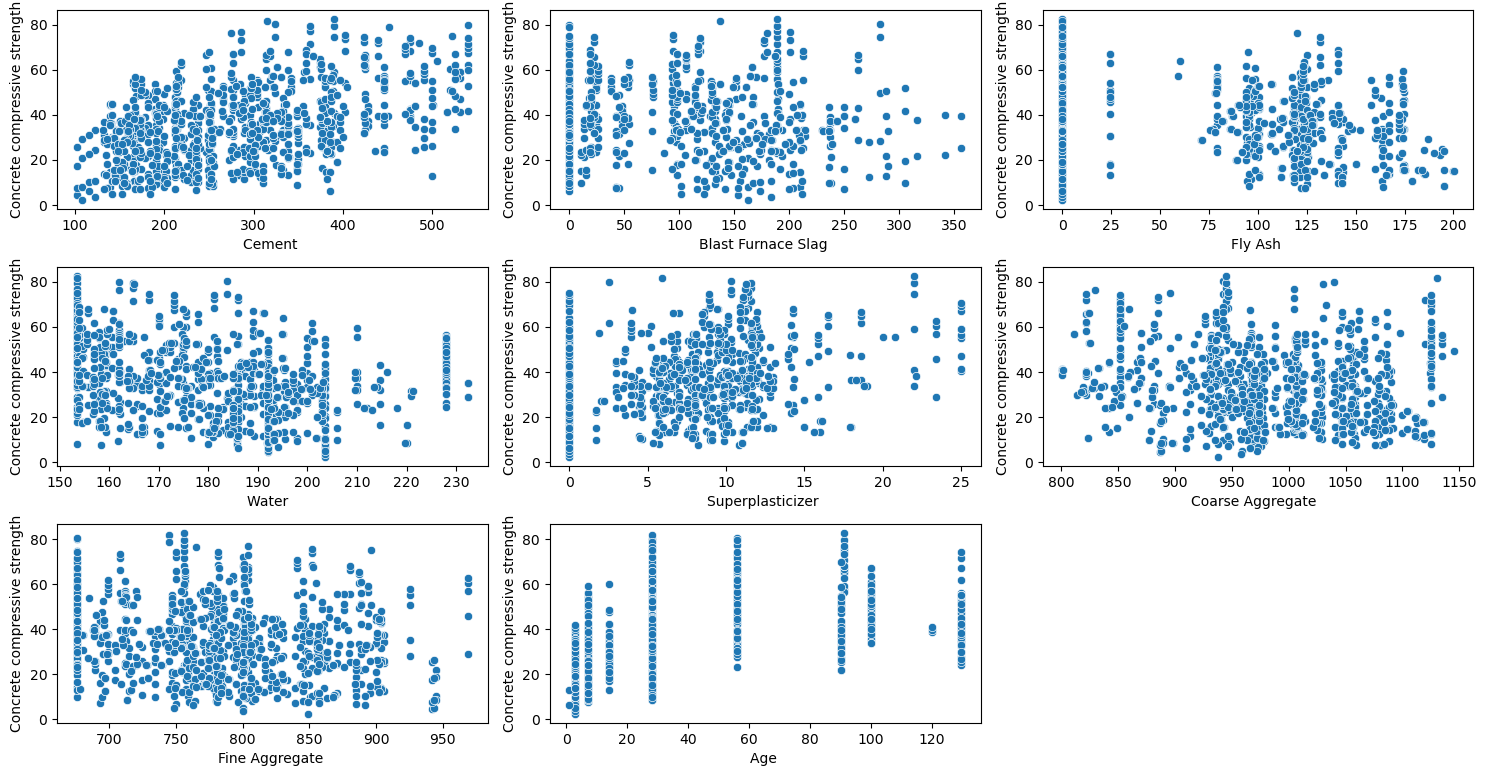

In [66]:
plt.figure(figsize=(15,10), facecolor= 'white')
plotnumber = 1
for i in X.columns:
    ax = plt.subplot(4,3, plotnumber)
    sns.scatterplot(x = df[i], y = y)
    plt.xlabel(i, fontsize = 10)
    plotnumber +=1
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

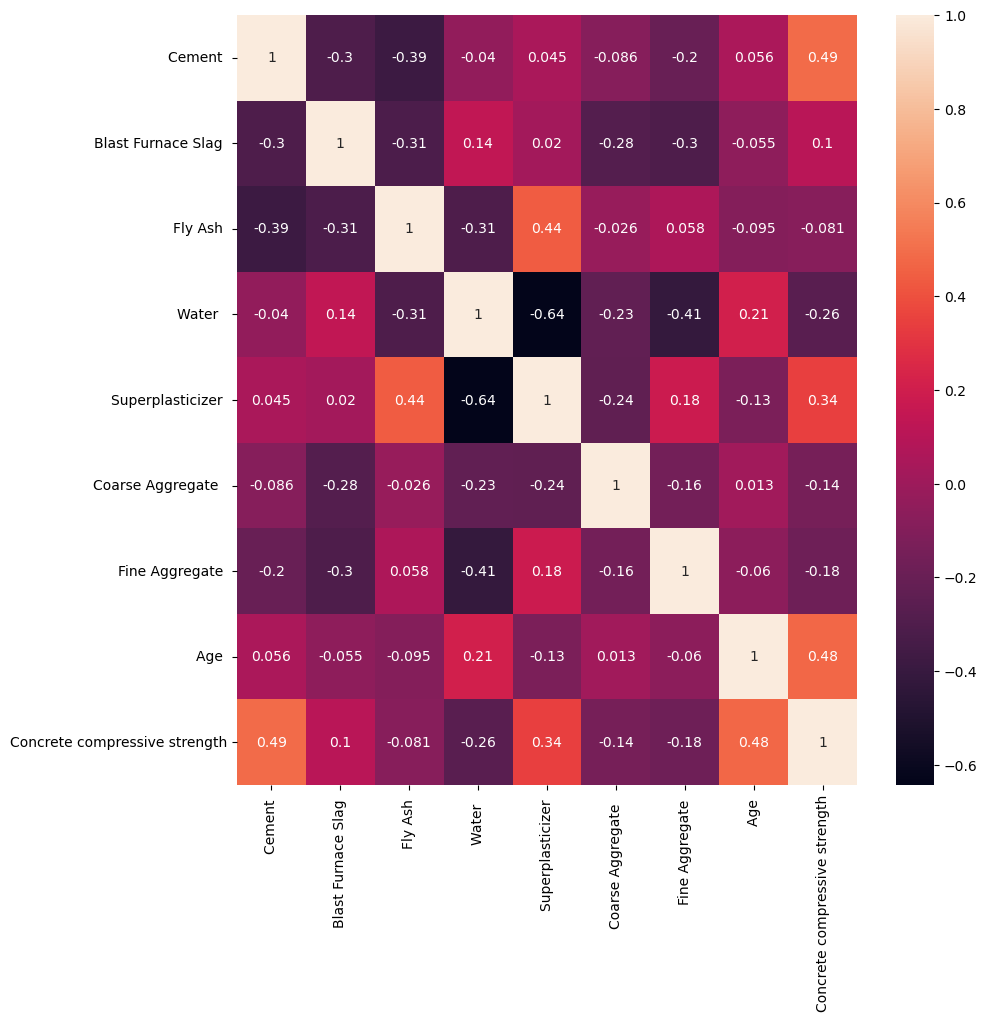

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)

In [84]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
def checkModel_performance(preprocessor, X_train, y_train, X_test, y_test):
    models = {'Linear Regression' :LinearRegression(),
              'Ridge Regression' : Ridge(alpha=1),
              'Lasso Regression': Lasso(alpha=1),
              'Random Forest Regression' : RandomForestRegressor(max_depth=5),
              'Gradient Boosting Regression' : GradientBoostingRegressor(learning_rate=0.1)     
    }

    for model_name, model in models.items():
        pipeline = make_pipeline(preprocessor, model)
        pipeline.fit(X_train,y_train)
        y_pred = pipeline.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f'{model_name} - Mean Squred Error = {mse:.2f} \n {model_name} - r2_score = {r2:.2f}')

In [91]:
preprocessor_01 = make_pipeline(KNNImputer(n_neighbors=3), StandardScaler())
preprocessor_02 = make_pipeline(KNNImputer(n_neighbors=3), RobustScaler())
preprocessor_03 = make_pipeline(KNNImputer(n_neighbors=3), MinMaxScaler())

print(f"{'=' * 10} Result For StandardScaler{'=' * 10}")
checkModel_performance(preprocessor_01, X_train, y_train, X_test, y_test)

print(f"\n{'=' * 10} Result For RobustScaler{'=' * 10}")
checkModel_performance(preprocessor_02, X_train, y_train, X_test, y_test)

print(f"\n{'=' * 10} Result For MinMaxScaler{'=' * 10}")
checkModel_performance(preprocessor_03, X_train, y_train, X_test, y_test)

========== Result For StandardScaler==========
Linear Regression - Mean Squred Error = 88.58 
 Linear Regression - r2_score = 0.69
Ridge Regression - Mean Squred Error = 88.56 
 Ridge Regression - r2_score = 0.69
Lasso Regression - Mean Squred Error = 101.64 
 Lasso Regression - r2_score = 0.65
Random Forest Regression - Mean Squred Error = 51.98 
 Random Forest Regression - r2_score = 0.82
Gradient Boosting Regression - Mean Squred Error = 31.69 
 Gradient Boosting Regression - r2_score = 0.89

========== Result For RobustScaler==========
Linear Regression - Mean Squred Error = 88.58 
 Linear Regression - r2_score = 0.69
Ridge Regression - Mean Squred Error = 88.51 
 Ridge Regression - r2_score = 0.69
Lasso Regression - Mean Squred Error = 107.46 
 Lasso Regression - r2_score = 0.63
Random Forest Regression - Mean Squred Error = 52.94 
 Random Forest Regression - r2_score = 0.82
Gradient Boosting Regression - Mean Squred Error = 31.83 
 Gradient Boosting Regression - r2_score = 0.89



In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100,200],
                'learning_rate' : [0.1,0.01],
              'max_depth': [5,3,7],
              'min_samples_split': [2,4],
              'min_samples_leaf' : [1,2,3]}

gb_rg = GradientBoostingRegressor()

grid = GridSearchCV(gb_rg, param_grid, scoring='neg_mean_squared_error', cv = 5, verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [5, 3, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [93]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [94]:
grid.best_score_

-23.594063893837124

In [96]:
grid.best_estimator_.score(X_test,y_test)

0.9245137069118731

In [99]:
y_pred = grid.best_estimator_.predict(X_test)
mean_squared_error(y_test, y_pred)

21.79108411904294